In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scanpy as sc
import pytometry as pm

/Users/MacBook/miniconda3/envs/venv_why_not/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

In [3]:
# Import modules
import flowsom as fs

In [4]:
plt.rcParams["figure.figsize"] = (6.5, 4.8)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 10

In [5]:
ff = fs.io.read_FCS("/Users/MacBook/stanford/PTB_drug_screen/PTB drug screen complete - Gated Populations/PTB_HV05_DMSO1_GMCSF - LiveLeukocytes.fcs")
ff

AnnData object with n_obs × n_vars = 77114 × 63
    var: 'n', 'channel', 'marker', '$PnB', '$PnR', '$PnE'
    uns: 'meta'

In [6]:
def count_files(directory):
    import os
    list = os.listdir(directory) # dir is your directory path
    number_files = len(list)
    return number_files
count_files("/Users/MacBook/stanford/PTB_drug_screen/PTB drug screen complete - Gated Populations")

48

In [7]:
ff.var.head()

,n,channel,marker,$PnB,$PnR,$PnE
Time,1,Time,,32,3665302,"0,0"
Event_length,2,Event_length,,32,124,"0,0"
Center,3,Center,,32,850,"0,0"
Width,4,Width,,32,2277,"0,0"
Residual,5,Residual,,32,515,"0,0"


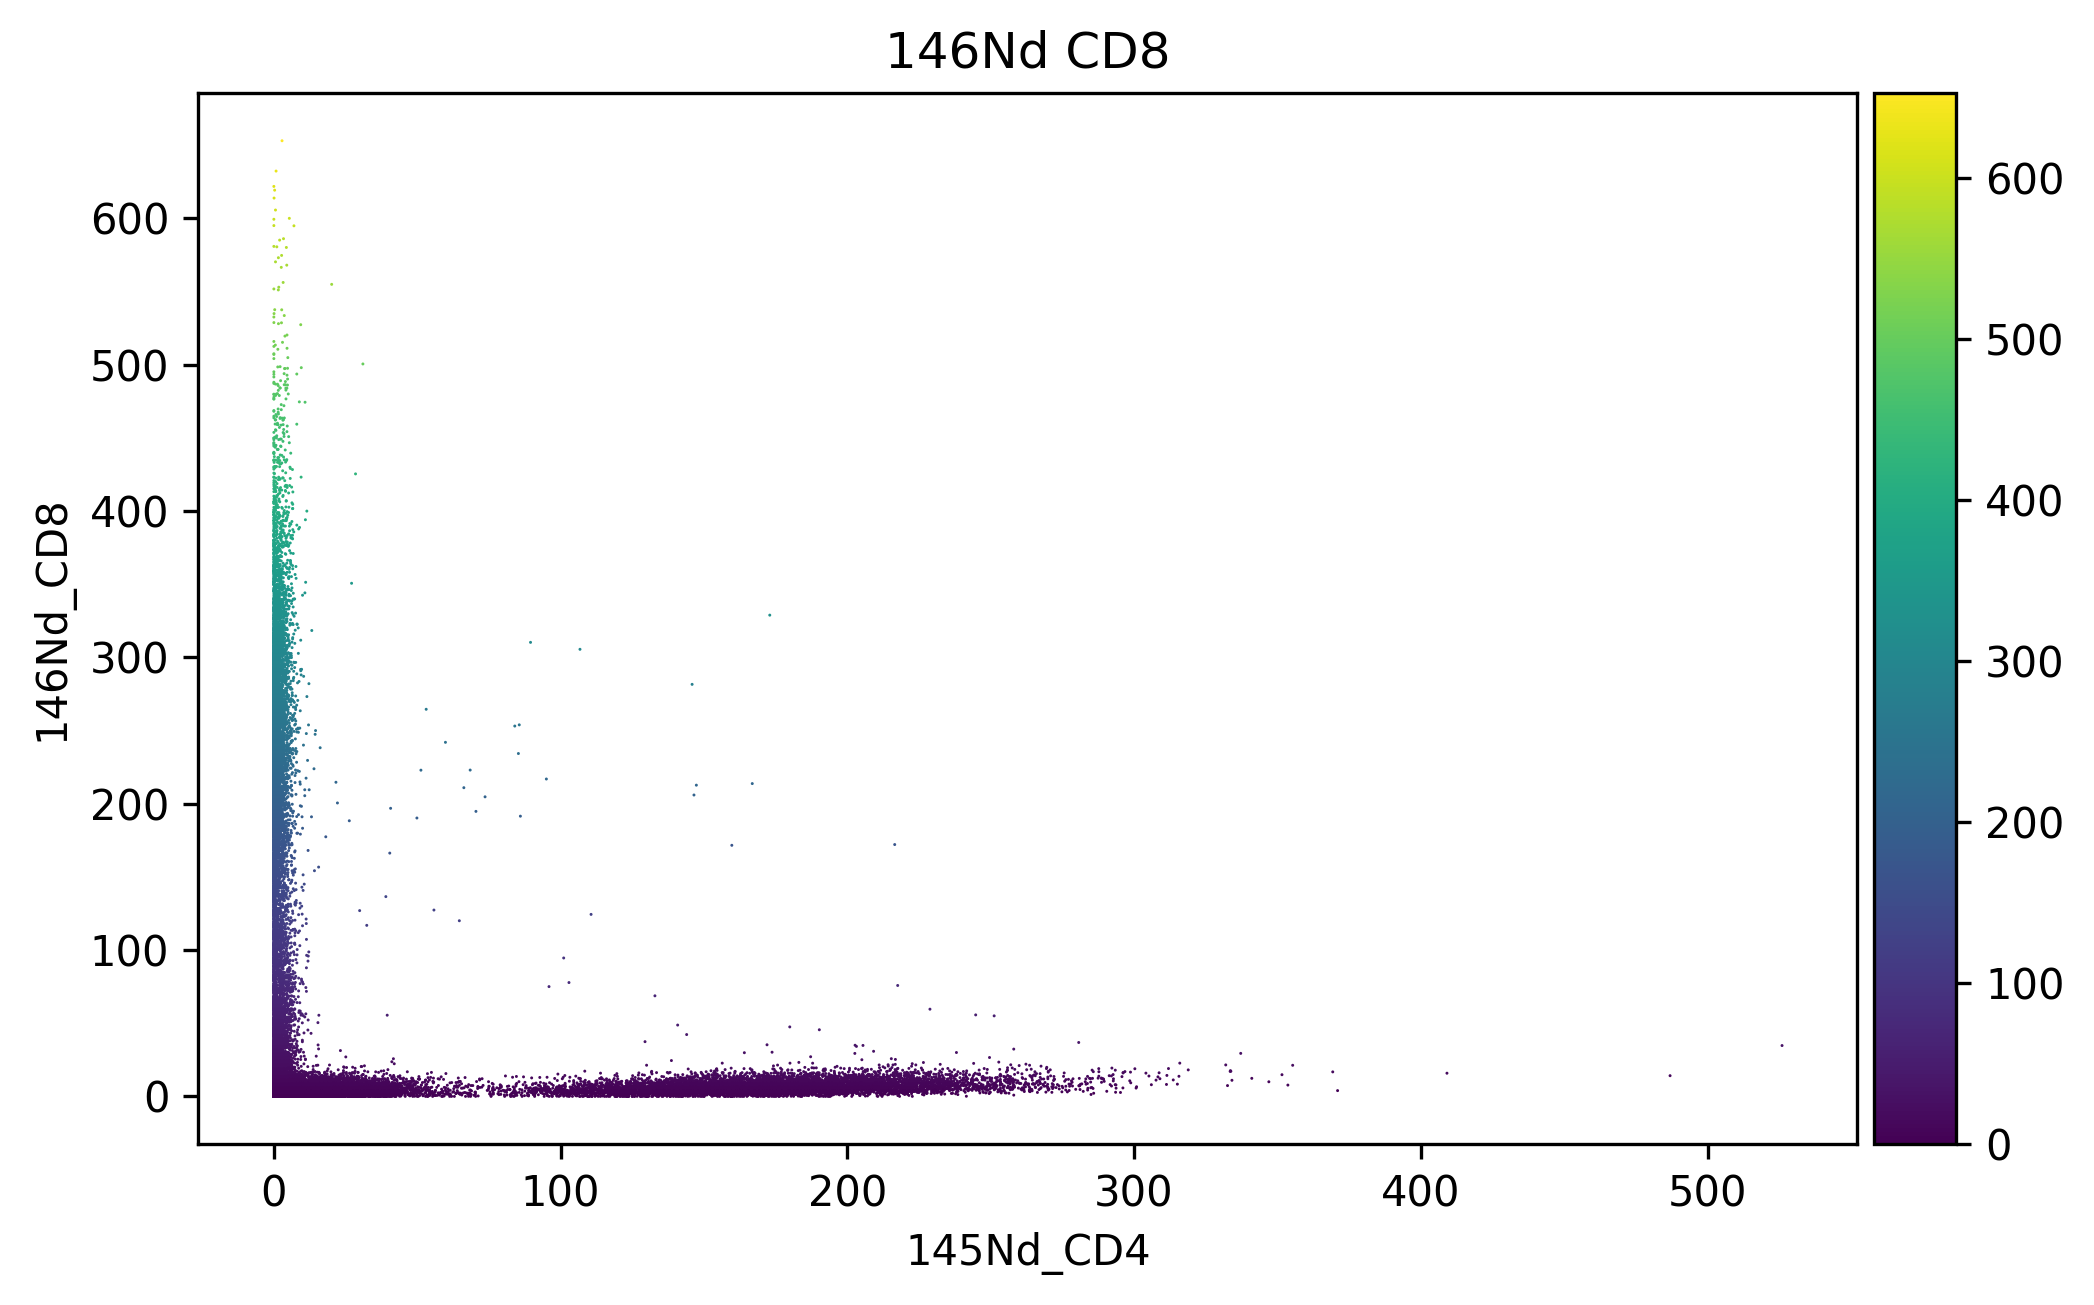

In [8]:
sc.pl.scatter(ff, x="145Nd_CD4", y="146Nd_CD8", color="146Nd_CD8", size=2)

cols: CD45, CD66, CD7, CD19, CD45RA, CD11b, CD4, CD8, CD11c, CD123,Tbet, FoxP3, CD16, CD25, CD62L, CCR2, HLADR, CD14, CD56, CD3

In [9]:

cols_to_use = [14,15,17,18,19,20,21,22,23,24,36,38,41,45,48,49,50,51,52,60]
colnames_to_use = ff[:, cols_to_use].var_names.tolist()
colnames_to_use

['115In_CD45',
 '139La_CD66',
 '141Pr_CD7',
 '142Nd_CD19',
 '143Nd_CD45RA',
 '144Sm_CD11b',
 '145Nd_CD4',
 '146Nd_CD8',
 '147Sm_CD11c',
 '148Sm_CD123',
 '160Gd_Tbet',
 '162Dy_FOXP3',
 '165Ho_CD16',
 '169Tm_CD25',
 '172Yb_CD62L',
 '173Yb_CCR2',
 '174Yb_HLADR',
 '175Lu_CD14',
 '176Lu_CD56',
 '198Pt_CD3']

In [10]:
ff_chan=ff[:, cols_to_use]

In [11]:
ff_t = pm.tl.normalize_arcsinh(ff, inplace=False)


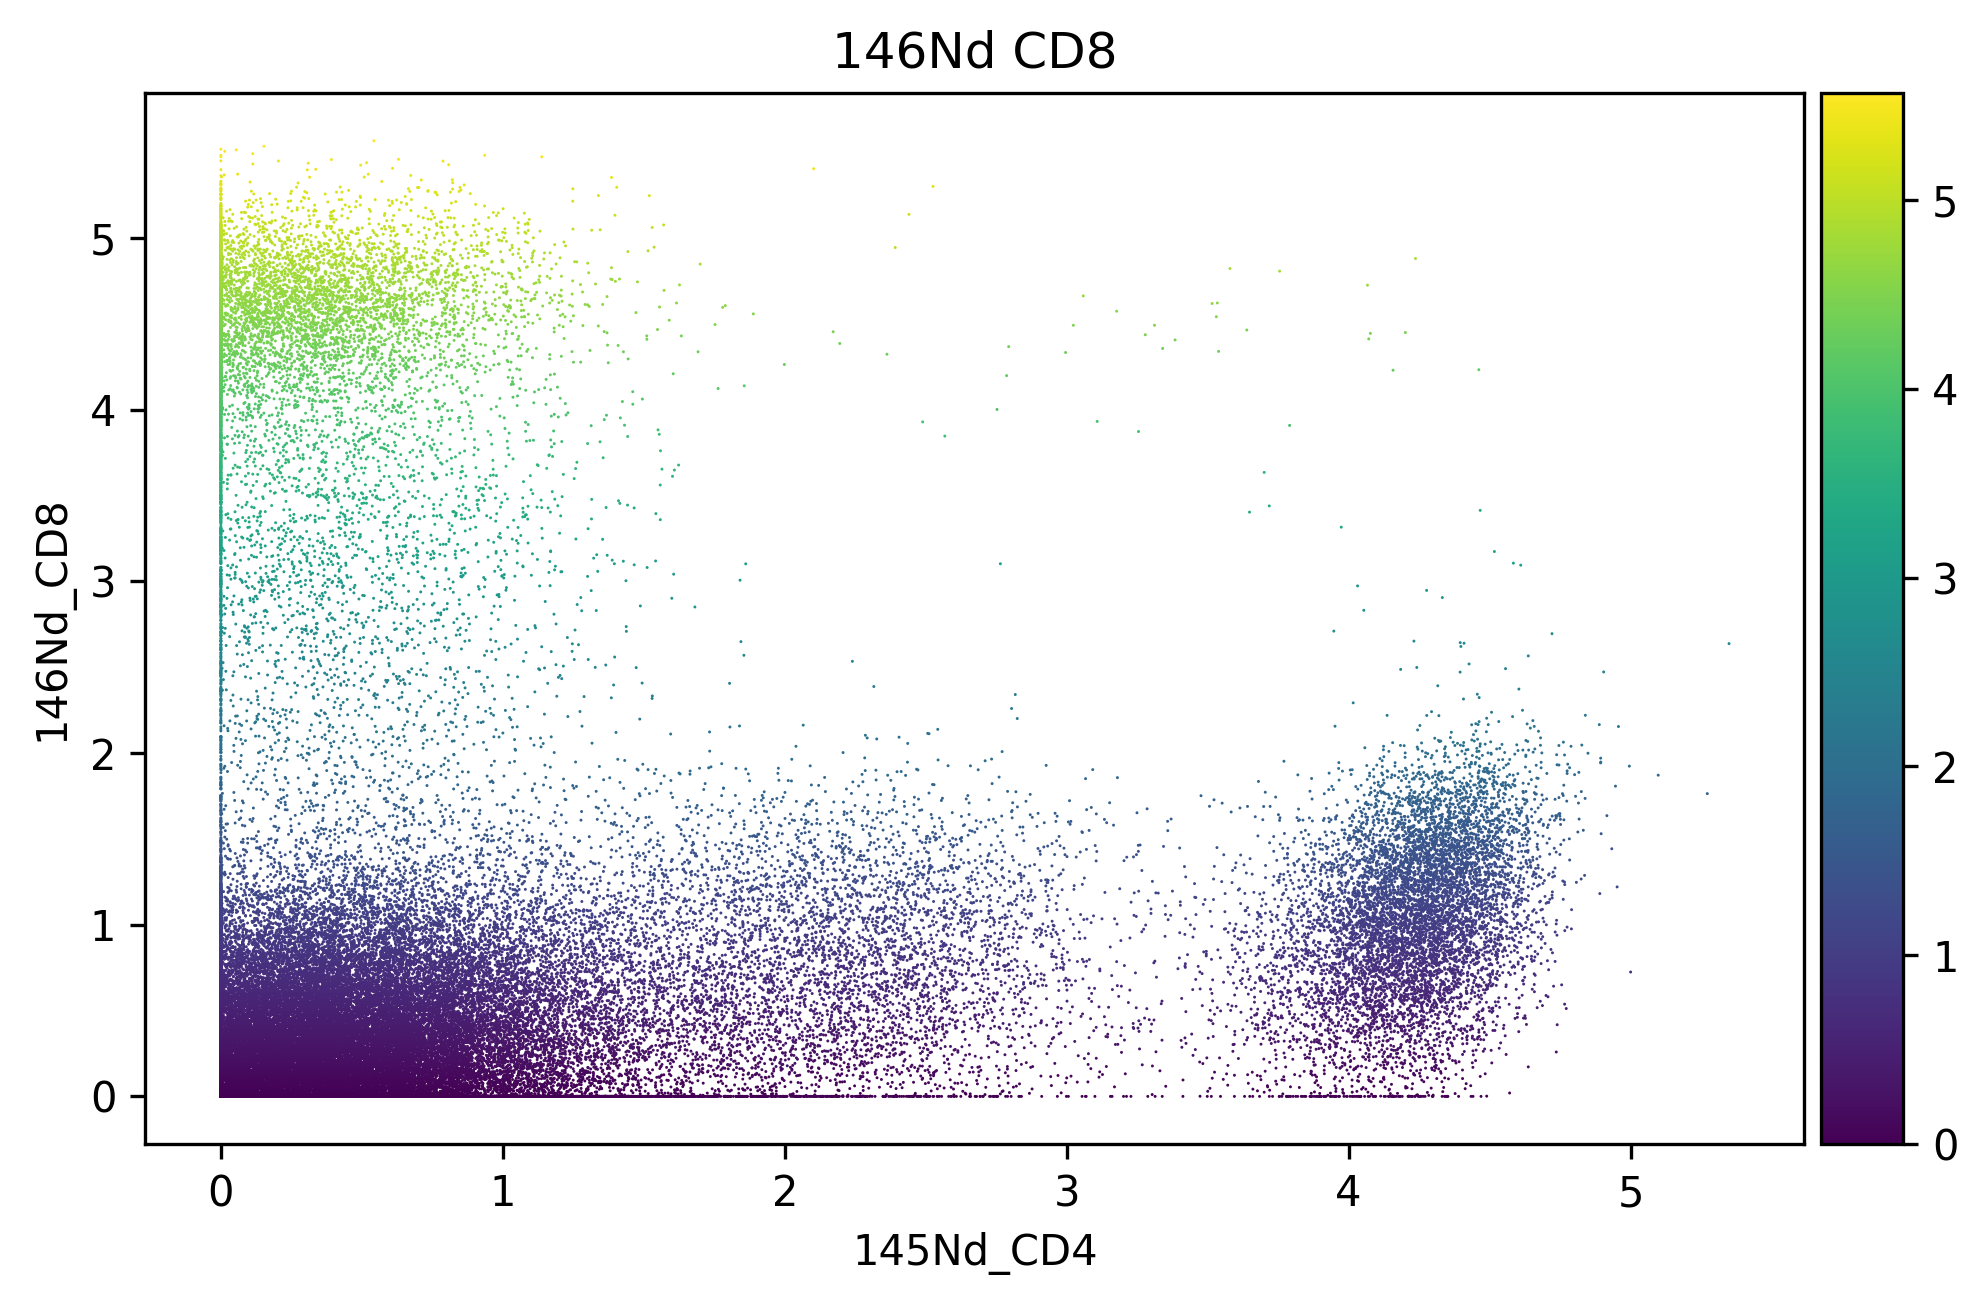

In [12]:
sc.pl.scatter(ff_t, x="145Nd_CD4", y="146Nd_CD8", color="146Nd_CD8", size=2)

In [13]:
fsom = fs.FlowSOM(ff_t.copy(), cols_to_use=cols_to_use, n_clusters=10, xdim=10, ydim=10, seed=42)

2025-03-13 16:44:49.668 | DEBUG    | flowsom.main:__init__:84 - Reading input.
2025-03-13 16:44:49.675 | DEBUG    | flowsom.main:__init__:86 - Fitting model: clustering and metaclustering.
2025-03-13 16:44:55.845 | DEBUG    | flowsom.main:__init__:88 - Updating derived values.


In [14]:
ff_clustered = fs.flowsom_clustering(ff_t, cols_to_use, xdim=10, ydim=10, n_clusters=10, seed=42)
ff_clustered

2025-03-13 16:44:57.709 | DEBUG    | flowsom.main:__init__:84 - Reading input.
2025-03-13 16:44:57.712 | DEBUG    | flowsom.main:__init__:86 - Fitting model: clustering and metaclustering.
2025-03-13 16:45:01.950 | DEBUG    | flowsom.main:__init__:88 - Updating derived values.


AnnData object with n_obs × n_vars = 77114 × 63
    obs: 'FlowSOM_clusters', 'FlowSOM_metaclusters'
    var: 'n', 'channel', 'marker', '$PnB', '$PnR', '$PnE'
    uns: 'meta', 'FlowSOM'

In [15]:
print(ff_clustered.obs.columns)  # Vérifie si "FlowSOM_cluster" est bien présent
print(ff_clustered.var_names)  # Vérifie si "145Nd_CD4" et "146Nd_CD8" sont bien présents


Index(['FlowSOM_clusters', 'FlowSOM_metaclusters'], dtype='object')
Index(['Time', 'Event_length', 'Center', 'Width', 'Residual', 'Offset',
       'Amplitude', '89Y', '104Pd_BC1', '105Pd_BC2', '106Pd_BC3', '108Pd_BC4',
       '110Pd_BC5', '113In_CD235ab_CD61', '115In_CD45', '139La_CD66',
       '140Ce_EQ Bead', '141Pr_CD7', '142Nd_CD19', '143Nd_CD45RA',
       '144Sm_CD11b', '145Nd_CD4', '146Nd_CD8', '147Sm_CD11c', '148Sm_CD123',
       '149Sm_pCREB', '150Nd_pSTAT5', '151Eu_pP38', '152Sm_PD1',
       '153Eu_pSTAT1', '154Sm_pSTAT3', '155Gd_pS6', '156Gd_CD44', '157Gd_CD36',
       '158Gd_PDL1', '159Tb_pMK2', '160Gd_Tbet', '161Dy_cPARP', '162Dy_FOXP3',
       '163Dy_GLUT1', '164Er_IkB', '165Ho_CD16', '166Er_pNFkB', '167Er_pERK',
       '168Er_pSTAT6', '169Tm_CD25', '170Er_pPLCg', '171Yb_pSTAT4',
       '172Yb_CD62L', '173Yb_CCR2', '174Yb_HLADR', '175Lu_CD14', '176Lu_CD56',
       '190BCKG', '191Ir', '193Ir_Intercalator-Ir', '194Pt_BC6', '195Pt_BC7',
       '196Pt_BC8', '197Au_BC9', '198Pt

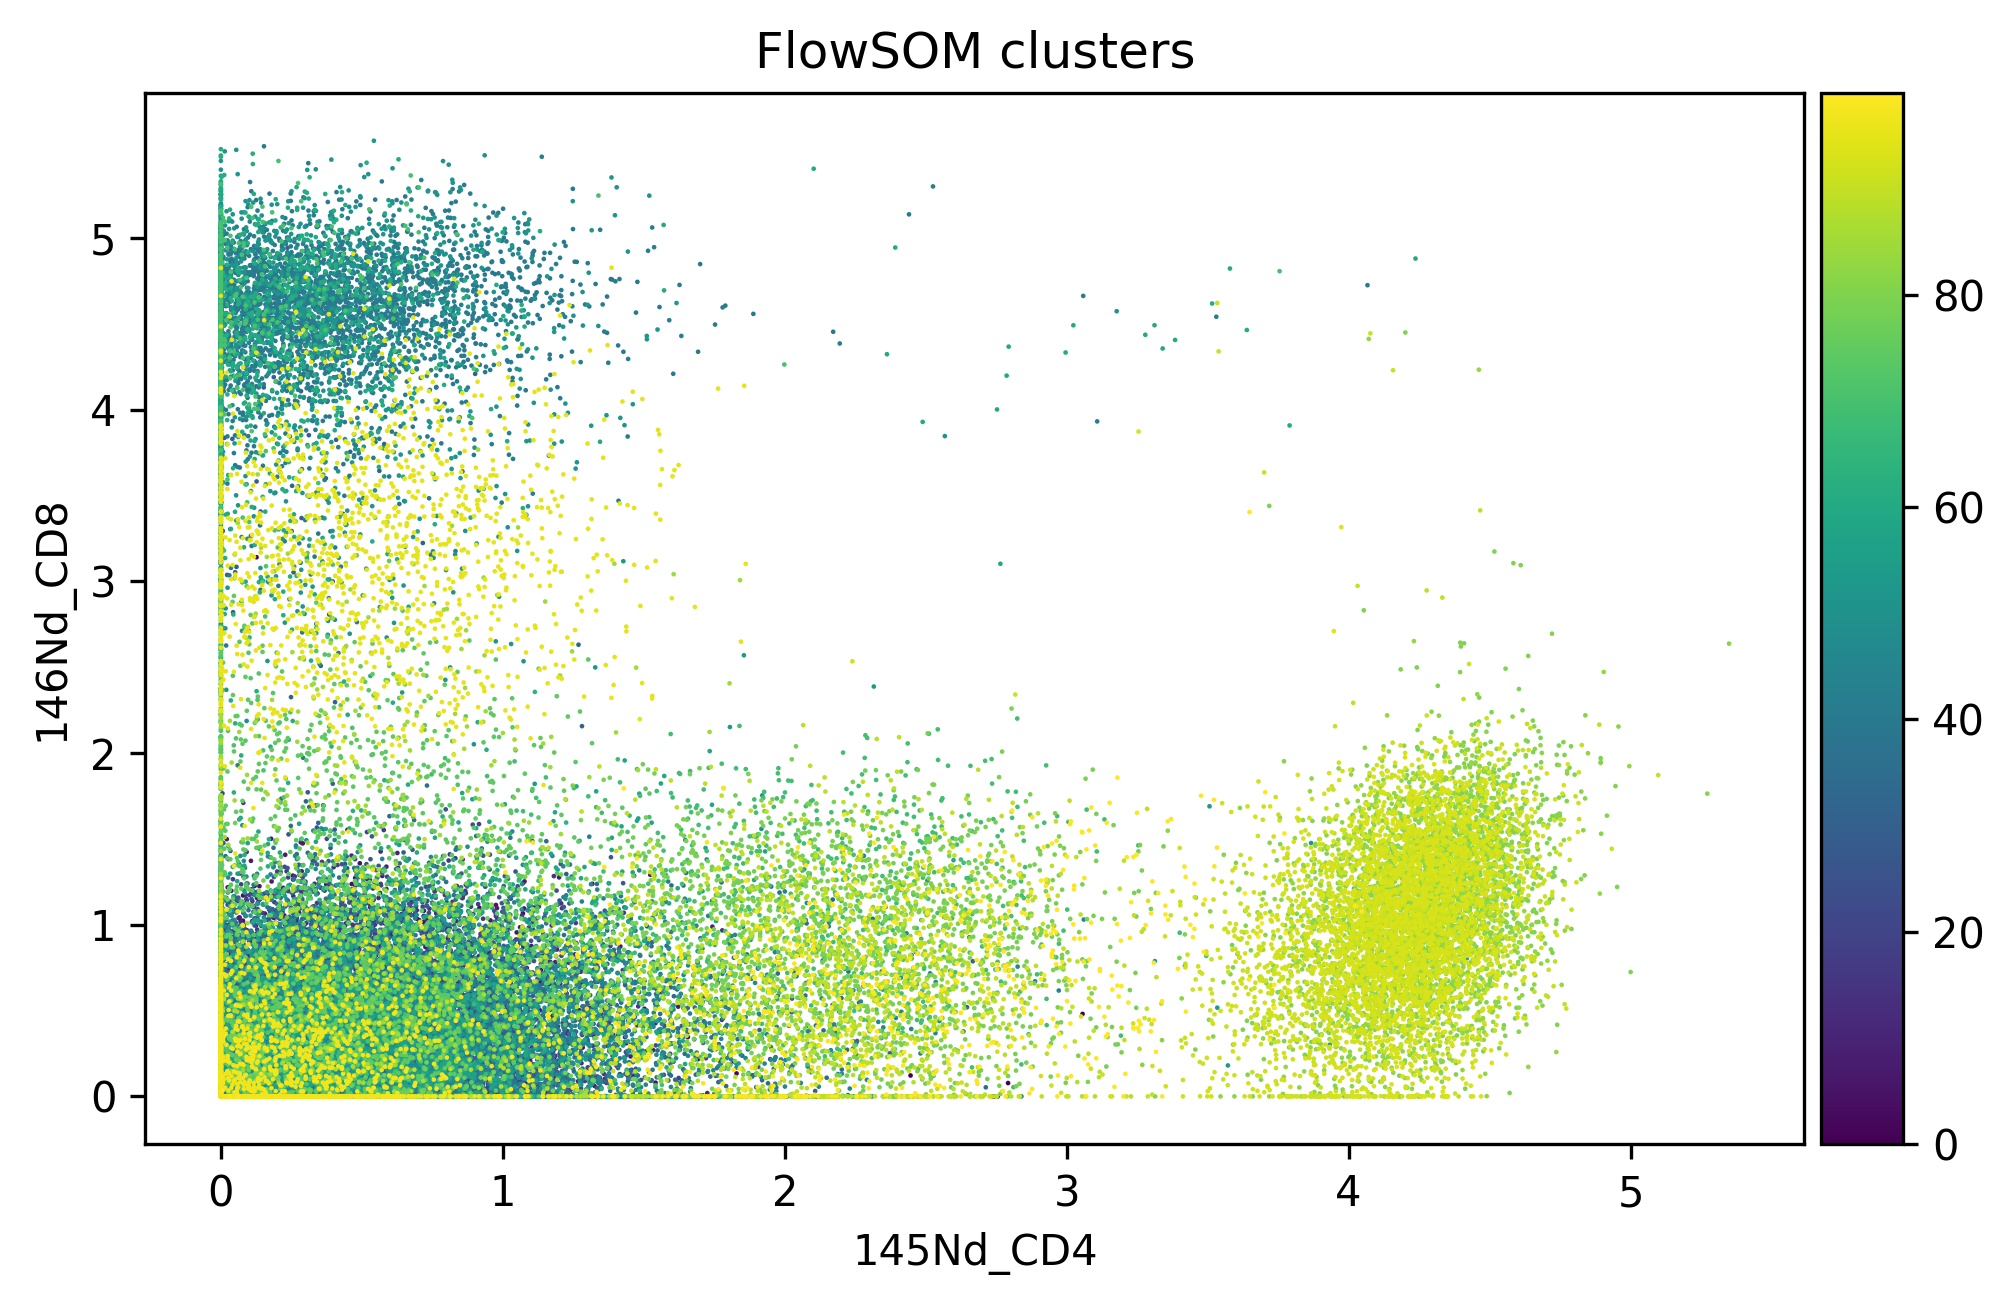

In [16]:
sc.pl.scatter(ff_clustered, x="145Nd_CD4", y="146Nd_CD8", color="FlowSOM_clusters", size=5)


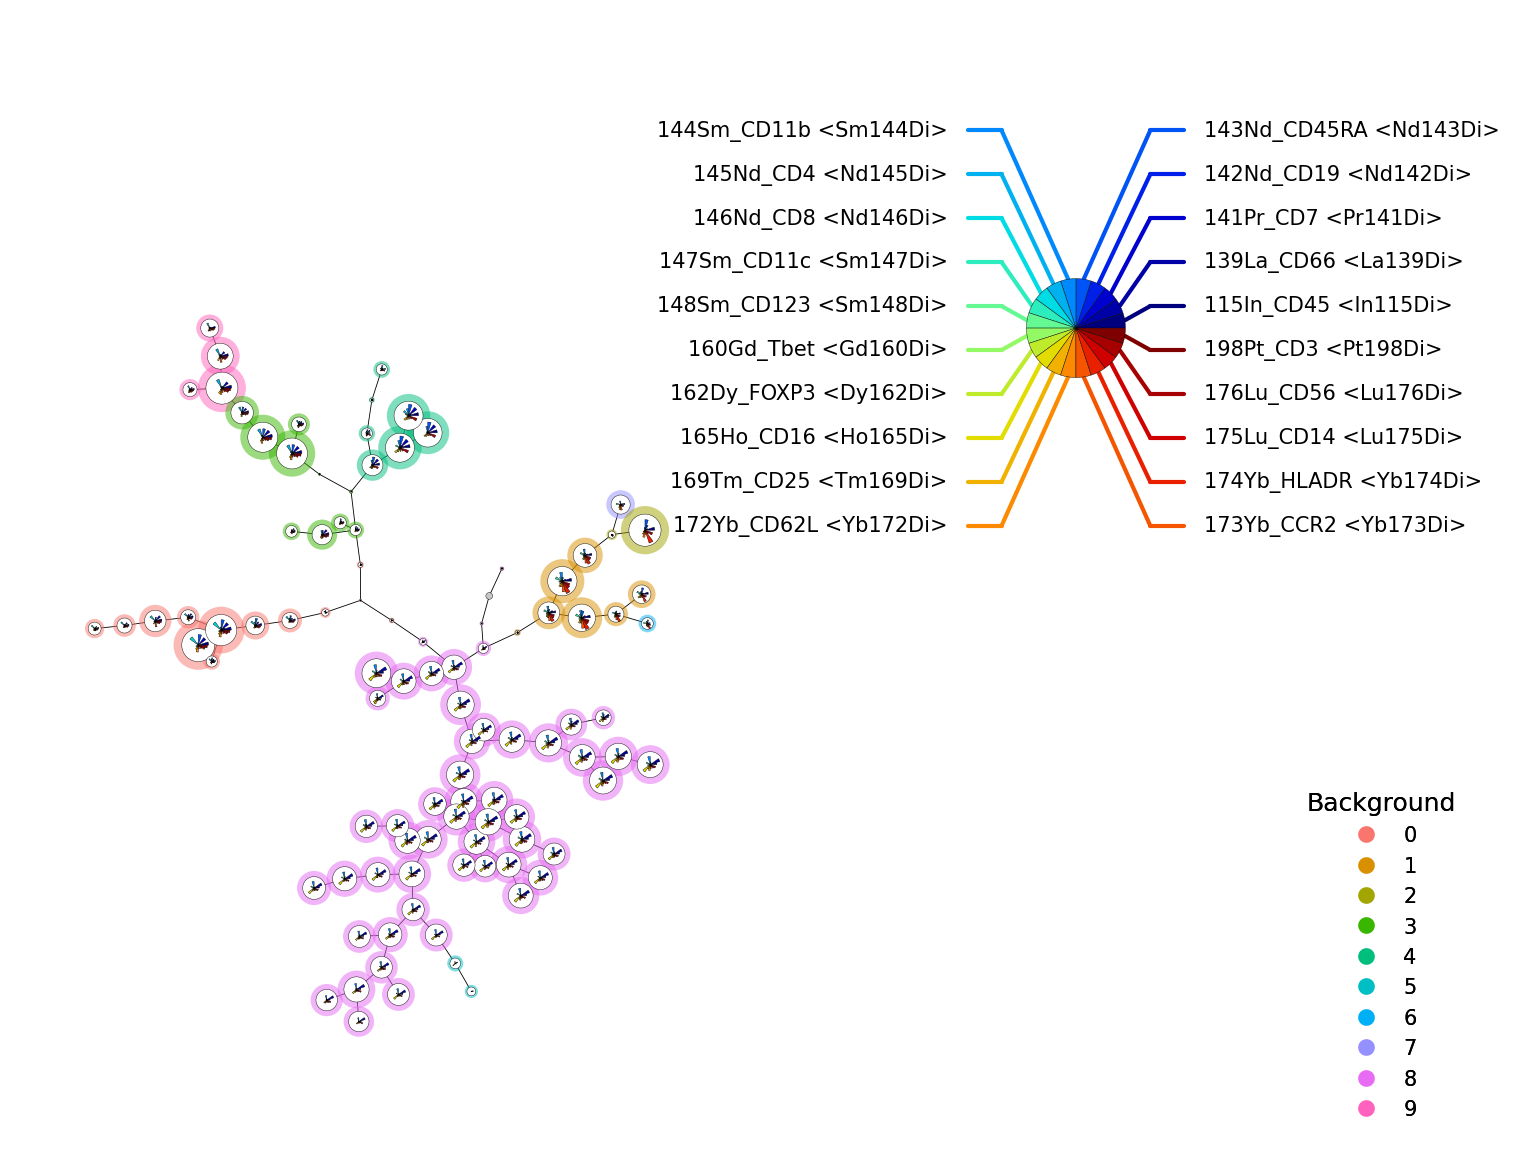

In [17]:
p = fs.pl.plot_stars(fsom, background_values=fsom.get_cluster_data().obs.metaclustering)

In [18]:
import PlottingFunction as pf
import importlib

importlib.reload(pf)

<module 'PlottingFunction' from '/Users/MacBook/stanford/PTB_drug_screen/PlottingFunction.py'>

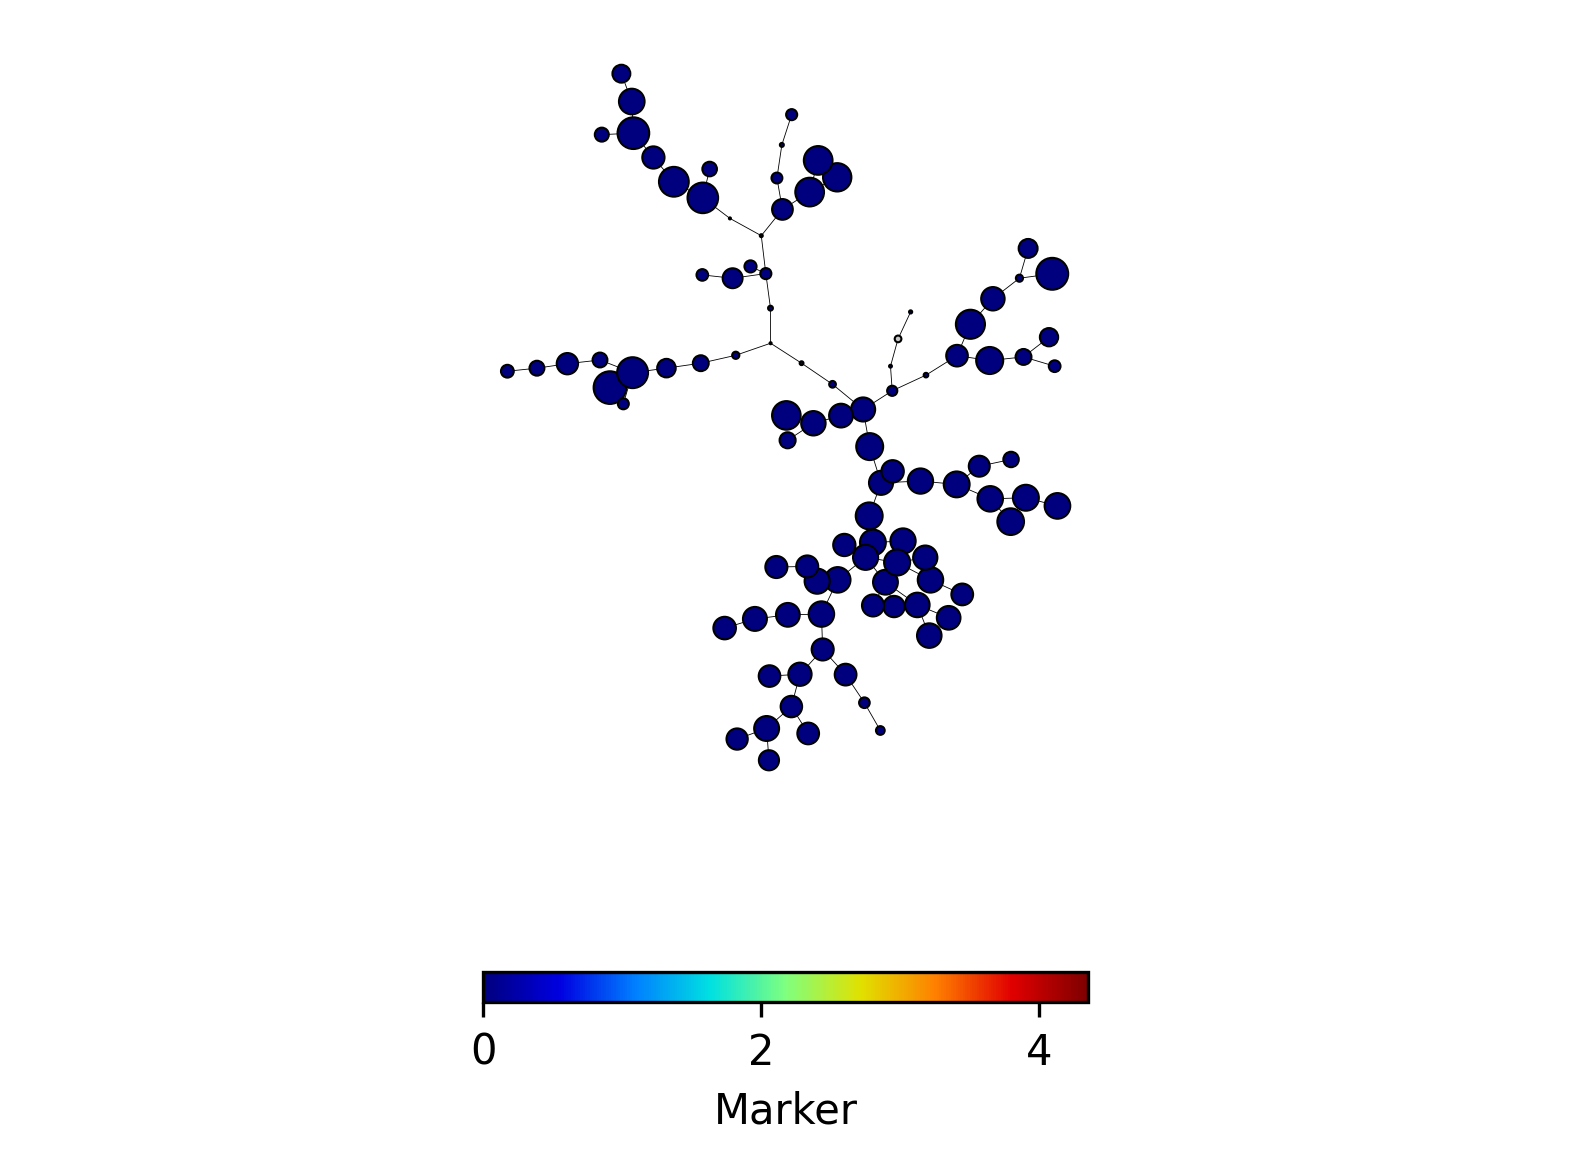

In [19]:
p=fs.pl.plot_marker(fsom, marker=["145Nd_CD4"])

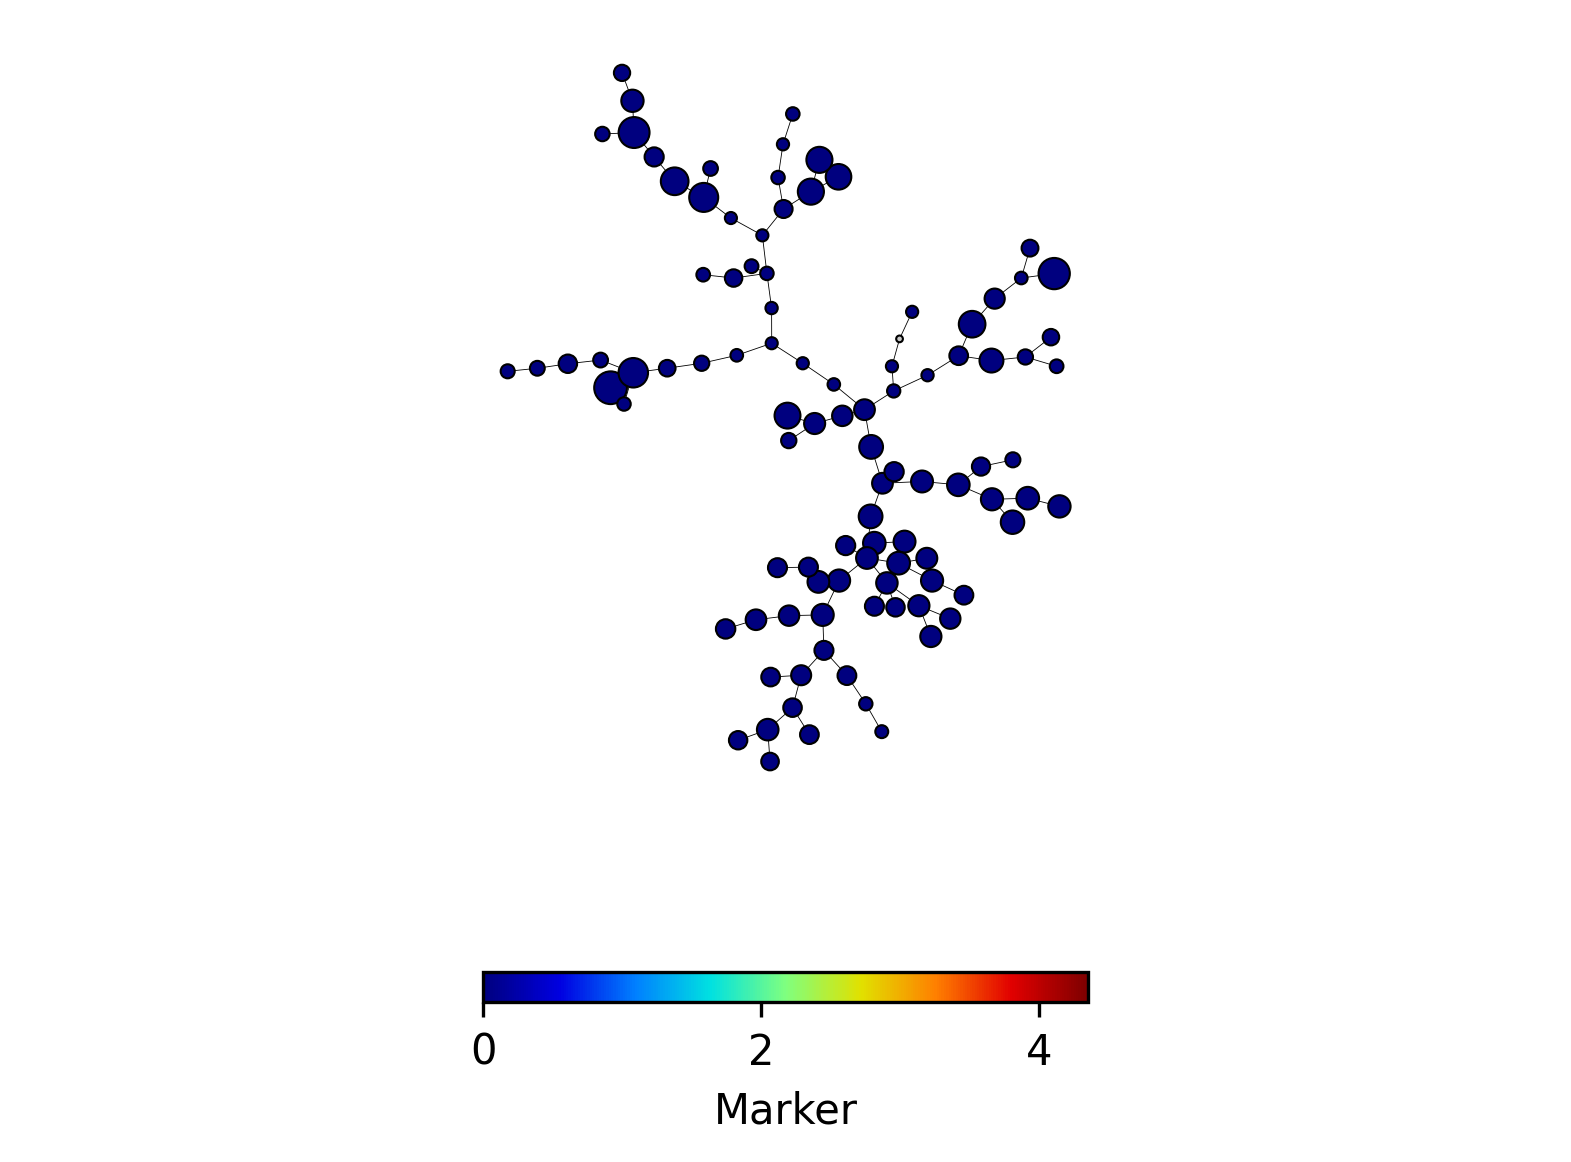

In [20]:
p = pf.plot_marker_cust(fsom, marker=["145Nd_CD4"])

In [21]:
ff

AnnData object with n_obs × n_vars = 77114 × 63
    var: 'n', 'channel', 'marker', '$PnB', '$PnR', '$PnE'
    uns: 'meta'